In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats

In [31]:

df_serie = pd.read_csv('df_serie.csv', sep=';')
df_serie = df_serie.drop('Unnamed: 3', axis=1)
print(df_serie)


    gestion  trimestre  tasa_desempleo
0      2016          1             5.8
1      2016          2             4.5
2      2016          3             4.0
3      2016          4             4.4
4      2017          1             5.7
5      2017          2             5.7
6      2017          3             4.4
7      2017          4             4.5
8      2018          1             5.8
9      2018          2             4.9
10     2018          3             4.7
11     2018          4             4.3
12     2019          1             6.0
13     2019          2             4.9
14     2019          3             4.3
15     2019          4             4.8


In [32]:
df_serie.dtypes

gestion             int64
trimestre           int64
tasa_desempleo    float64
dtype: object

In [33]:
df_serie.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [34]:
print(df_serie[['gestion', 'trimestre']].head())

   gestion  trimestre
0     2016          1
1     2016          2
2     2016          3
3     2016          4
4     2017          1


In [35]:
# Convertir las columnas 'gestion' y 'trimestre' a cadenas
df_serie['gestion'] = df_serie['gestion'].astype(str)
df_serie['trimestre'] = df_serie['trimestre'].astype(str)

# Combinar las columnas 'gestion' y 'trimestre' en una columna de fecha
df_serie['fecha'] = pd.to_datetime(df_serie['gestion'] + '-' + df_serie['trimestre'].replace({'1': '01', '2': '04', '3': '07', '4': '10'}), format='%Y-%m')


# Establecer la columna 'fecha' como índice
df_serie.set_index('fecha', inplace=True)


# Mostrar los primeros registros
print(df_serie.head())



           gestion trimestre  tasa_desempleo
fecha                                       
2016-01-01    2016         1             5.8
2016-04-01    2016         2             4.5
2016-07-01    2016         3             4.0
2016-10-01    2016         4             4.4
2017-01-01    2017         1             5.7


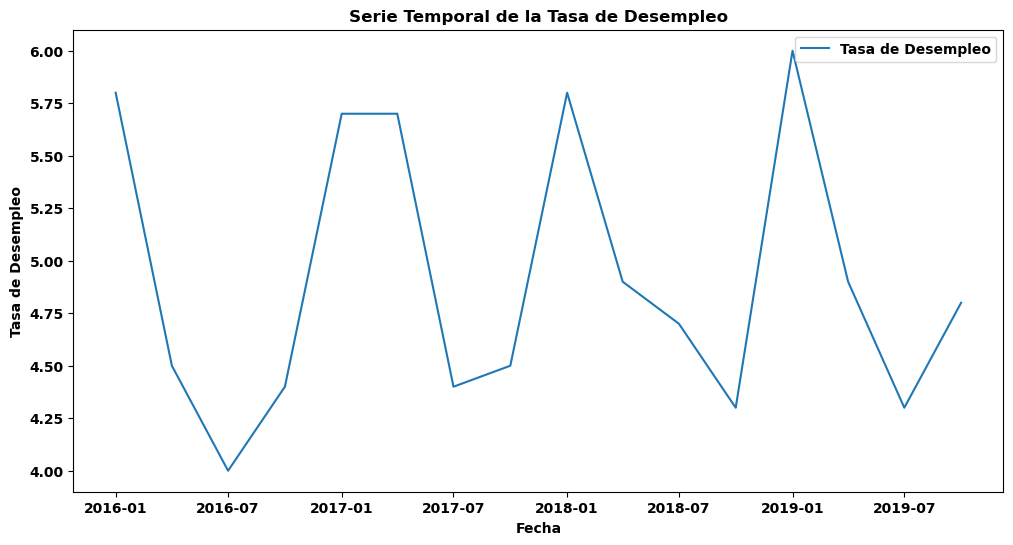

In [36]:
import matplotlib.pyplot as plt

# Gráfico de la serie temporal
plt.figure(figsize=(12, 6))
plt.plot(df_serie['tasa_desempleo'], label='Tasa de Desempleo')
plt.title('Serie Temporal de la Tasa de Desempleo')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Desempleo')
plt.legend()
plt.show()


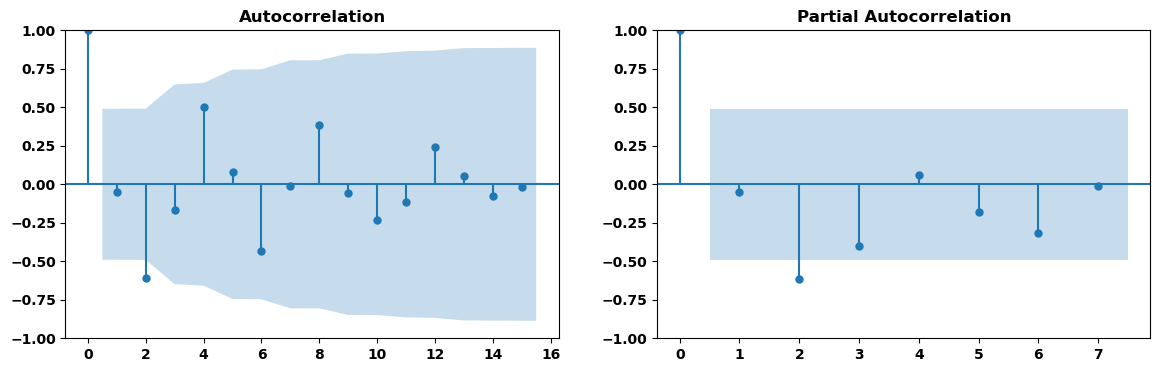

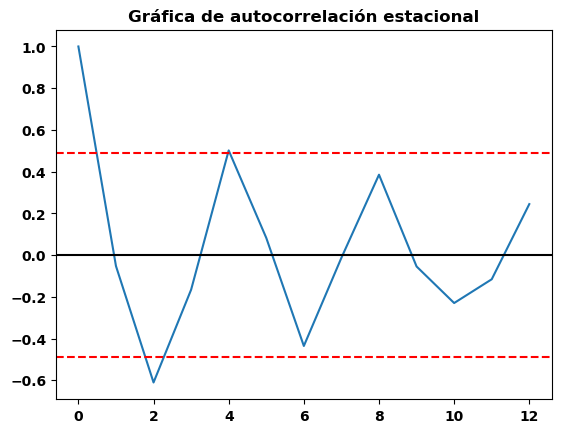

In [37]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import statsmodels

# Gráficos de ACF y PACF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
plot_acf(df_serie['tasa_desempleo'], lags=15, ax=ax1)
plot_pacf(df_serie['tasa_desempleo'], lags=7, ax=ax2)
plt.show()

# Calcula la gráfica de autocorrelación estacional
acf = statsmodels.tsa.stattools.acf(df_serie['tasa_desempleo'], nlags=12)

# Crea la gráfica
plt.plot(acf)
plt.axhline(y=0, color='black')
plt.axhline(y=1.96/np.sqrt(len(df_serie)), color='red', linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(df_serie)), color='red', linestyle='--')
plt.title('Gráfica de autocorrelación estacional')
plt.show()

In [38]:
import statsmodels.api as sm
import numpy as np

tasa_desempleo = df_serie['tasa_desempleo']

# Ajuste el modelo SARIMA
model = sm.tsa.statespace.SARIMAX(
    tasa_desempleo,
    order=(1, 0, 1),
    seasonal_order=(1, 0, 1, 12),
    trend='c',
)
result = model.fit()

# Imprime los parámetros del modelo
print(result.params)

# Calcula las métricas
mse = result.mse
rmse = np.sqrt(mse)
mae = result.mae

# Calcula el R cuadrado manualmente
actual_values = tasa_desempleo
fitted_values = result.fittedvalues
mean_actual = actual_values.mean()
r_squared = 1 - (np.sum((actual_values - fitted_values) ** 2) / np.sum((actual_values - mean_actual) ** 2))

# Calcula el MAPE
mape = np.mean(np.abs((actual_values - fitted_values) / actual_values)) * 100

# Imprime todas las métricas
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)
print('R-squared:', r_squared)
print('MAPE:', mape)


intercept    2.699416
ar.L1       -0.975718
ma.L1        0.981179
ar.S.L12     0.723605
ma.S.L12     0.983078
sigma2       0.056100
dtype: float64
MSE: 0.3317715837659251
RMSE: 0.5759961664507196
MAE: 0.5151064156583005
R-squared: 0.18388079711658667
MAPE: 10.519512546213713


C:\Users\win10\anaconda3\jupyter\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\win10\anaconda3\jupyter\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\win10\anaconda3\jupyter\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [39]:
# Realiza predicciones para los próximos 12 trimestres
predicciones = result.predict(start=pd.to_datetime('2020-01-01'), end=pd.to_datetime('2025-03-31'))

# Imprime las predicciones
print(predicciones)



2020-01-01    5.590817
2020-04-01    5.599772
2020-07-01    4.470960
2020-10-01    4.565158
2021-01-01    5.677927
2021-04-01    4.909418
2021-07-01    4.730409
2021-10-01    4.391897
2022-01-01    5.872717
2022-04-01    5.099981
2022-07-01    4.562868
2022-10-01    5.020030
2023-01-01    5.403506
2023-04-01    5.426447
2023-07-01    4.593572
2023-10-01    4.677405
2024-01-01    5.467319
2024-04-01    4.926143
2024-07-01    4.782053
2024-10-01    4.551308
2025-01-01    5.608978
2025-04-01    5.063344
Freq: QS-OCT, Name: predicted_mean, dtype: float64


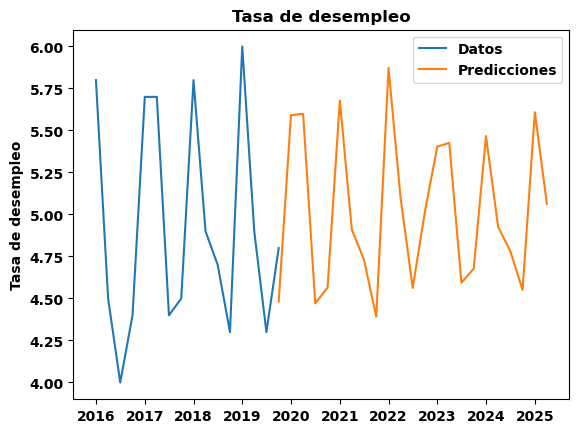

In [40]:
import matplotlib.pyplot as plt

# Carga los datos de la tasa de desempleo
tasa_desempleo = df_serie.tasa_desempleo

# Realiza predicciones para los próximos 12 trimestres
predicciones = result.predict(start=pd.to_datetime('2019-10-01'), end=pd.to_datetime('2025-03-31'))

# Grafica los datos
plt.plot(tasa_desempleo)
plt.plot(predicciones)
plt.title('Tasa de desempleo')
plt.ylabel('Tasa de desempleo')
plt.legend(['Datos', 'Predicciones'])
plt.show()


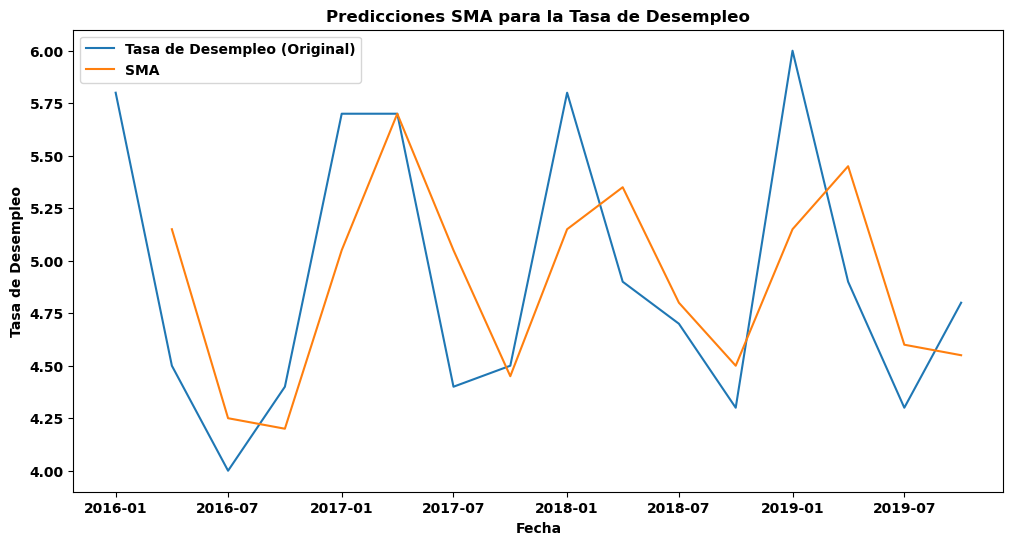

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que df_serie es tu DataFrame con la columna 'tasa_desempleo'
df_serie_sma = df_serie.copy()

# Promedio Móvil Simple (SMA)
df_serie_sma['sma'] = df_serie_sma['tasa_desempleo'].rolling(window=2).mean()

# Visualizar los resultados SMA
plt.figure(figsize=(12, 6))
plt.plot(df_serie_sma['tasa_desempleo'], label='Tasa de Desempleo (Original)')
plt.plot(df_serie_sma['sma'], label='SMA')
plt.title('Predicciones SMA para la Tasa de Desempleo')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Desempleo')
plt.legend()
plt.show()


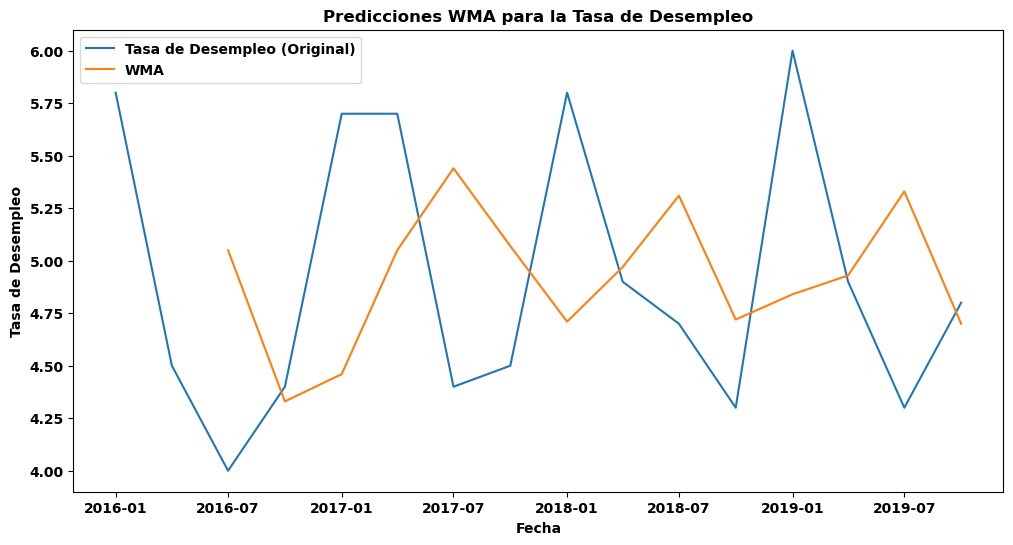

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_serie_wma = df_serie.copy()

# Promedio Móvil Ponderado (WMA)
weights = np.array([0.5, 0.3, 0.2])  # Ajusta los pesos según la importancia
df_serie_wma['wma'] = df_serie_wma['tasa_desempleo'].rolling(window=3).apply(lambda x: np.dot(x, weights))

# Visualizar los resultados WMA
plt.figure(figsize=(12, 6))
plt.plot(df_serie_wma['tasa_desempleo'], label='Tasa de Desempleo (Original)')
plt.plot(df_serie_wma['wma'], label='WMA')
plt.title('Predicciones WMA para la Tasa de Desempleo')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Desempleo')
plt.legend()
plt.show()

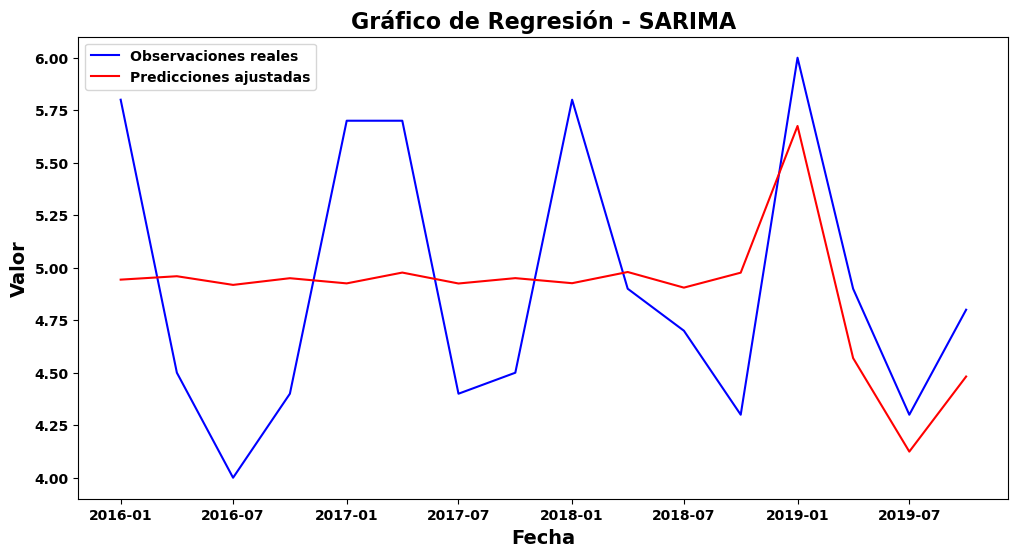

In [43]:
import matplotlib.pyplot as plt
import statsmodels.api as sm


# Definir la serie temporal
serie_temporal = df_serie['tasa_desempleo']

# Obtener las predicciones ajustadas
fitted_values = result.fittedvalues

# Gráfico de regresión
plt.figure(figsize=(12, 6))
plt.plot(serie_temporal, label='Observaciones reales', color='blue')
plt.plot(fitted_values, label='Predicciones ajustadas', color='red')
plt.title('Gráfico de Regresión - SARIMA', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Valor', fontsize=14)
plt.legend()
plt.show()


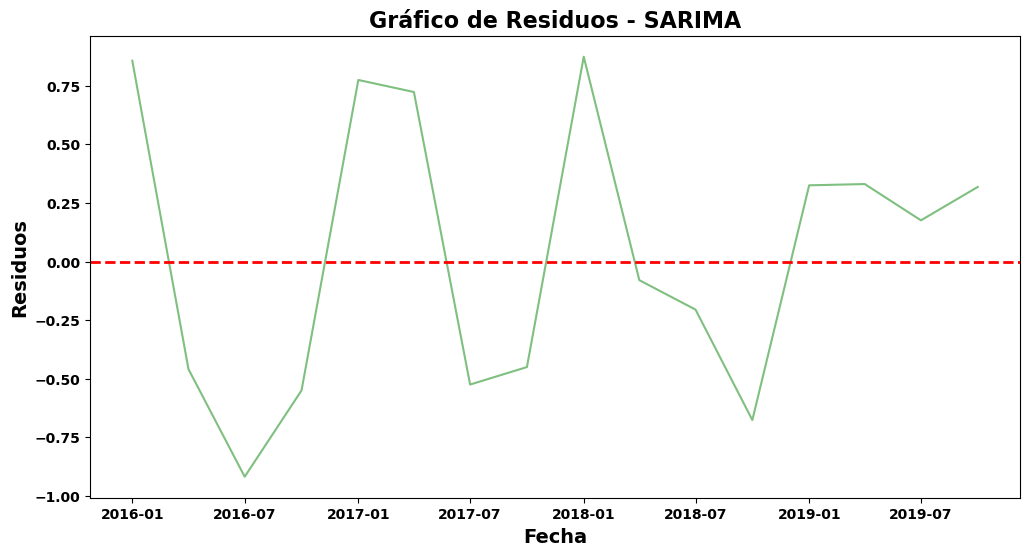

In [44]:
import matplotlib.pyplot as plt
import statsmodels.api as sm


# Obtener los residuos del modelo SARIMA
residuos = result.resid

# Gráfico de residuos
plt.figure(figsize=(12, 6))
plt.plot(residuos, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)  # Línea base en cero
plt.title('Gráfico de Residuos - SARIMA', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Residuos', fontsize=14)
plt.show()

In [45]:
aic = result.aic
bic = result.bic

print("AIC:", aic)
print("BIC:", bic)


AIC: 37.09140545694227
BIC: 41.72693779038095


In [48]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [55]:
# Calcular el estadístico Q y el p-valor
lb_stat, lb_pvalue, _ = sm.stats.acorr_ljungbox(residuos, lags=[12])  # Seleccionar el número de lags apropiado

# Imprimir detalles sobre los valores calculados
print("Estadístico Q:", lb_stat)
print("P-valor:", lb_pvalue)

# Evaluar el p-valor
if lb_pvalue < 0.05:
    print("Se rechaza la hipótesis nula de independencia de residuos.")
else:
    print("No se rechaza la hipótesis nula de independencia de residuos.")


ValueError: not enough values to unpack (expected 3, got 2)

In [54]:
# Imprimir el valor del p-valor antes de la conversión
print("Tipo de lb_pvalue_first_lag:", type(lb_pvalue_first_lag))
print("Valor de lb_pvalue_first_lag:", lb_pvalue_first_lag)


Tipo de lb_pvalue_first_lag: <class 'str'>
Valor de lb_pvalue_first_lag: l


In [47]:
# Calcular el estadístico de Durbin-Watson
durbin_watson_stat = sm.stats.durbin_watson(residuos)

print("Estadístico de Durbin-Watson:", durbin_watson_stat)

# Evaluar el estadístico de Durbin-Watson
if durbin_watson_stat < 1.5 or durbin_watson_stat > 2.5:
    print("Se sugiere la presencia de autocorrelación en los residuos.")
else:
    print("No se sugiere la presencia de autocorrelación en los residuos.")


Estadístico de Durbin-Watson: 1.7606227803251544
No se sugiere la presencia de autocorrelación en los residuos.
